## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [75]:
titanic_data = pd.read_csv('titanic.csv')

print(titanic_data.describe())

print("Розмірність: ",titanic_data.shape)

titanic_data.info()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Розмірність:  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 ent

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [76]:
print("Пропущенні значення по кожному атрибуту:")
titanic_data.isna().sum()

Пропущенні значення по кожному атрибуту:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

По перше ми маємо 3 стовпця, в котрих є пропущенні значення, це "Age", "Cabin" та "Embarked".

Розмірність датасету складає (891, 12), тому можна сказати, що усього було 891 пасажира. Середня ціна квитка 32.204208, а більшість колонок я числовими.
Також можна зазначати, що більшість пасажирів не вижило, та більшість пассажирів є першого або другого классу. 

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



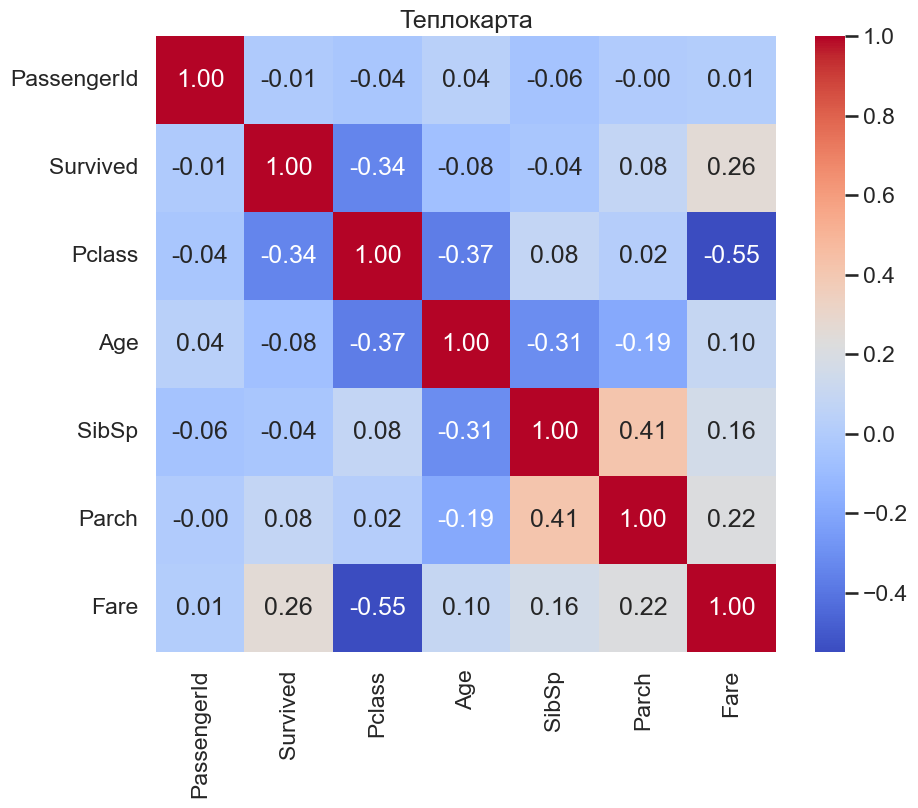

In [77]:
numeric_columns = titanic_data.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Теплокарта')
plt.show()

Ваші висновки:

Завдяки цій теплокарті можна побачити кореляцію між ціною, классом квитка та виживанням(позитивна). Також можна помітити кореляцію між виживанням сімей.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [78]:
def fill_empty(data, column, groups):
    group_medians = data.groupby(groups)[column].median().reset_index()
    # Об'єднання
    df_merged = pd.merge(data, group_medians, on=groups, suffixes=('', '_median'), how='left')
    df_merged[column].fillna(df_merged[column + '_median'], inplace=True)
    df_merged.drop(column + '_median', axis=1, inplace=True)
    
    return df_merged

print("До заповнення:",titanic_data.isna().sum())


titanic_data_filled = fill_empty(titanic_data, 'Age', ['Pclass', 'Sex'])

print("\nПісля заповнення:", titanic_data_filled.isna().sum())

До заповнення: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Після заповнення: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

Ми заповнили пропущенні значання в колонці 'Age' завдяки медіани та групам (класс пасажира та статтю). Щоб зробити це, ми спочатку сгрупували дані за вказаними колонками і обчислили медіану для кожної групи. Після цього об'єднали вихідний датафрейм з таблицею медіан по групах. Потім заповнили пропущені значення в колонці медіаною по групах, і видаляємо додаткову колонку з медіаною.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





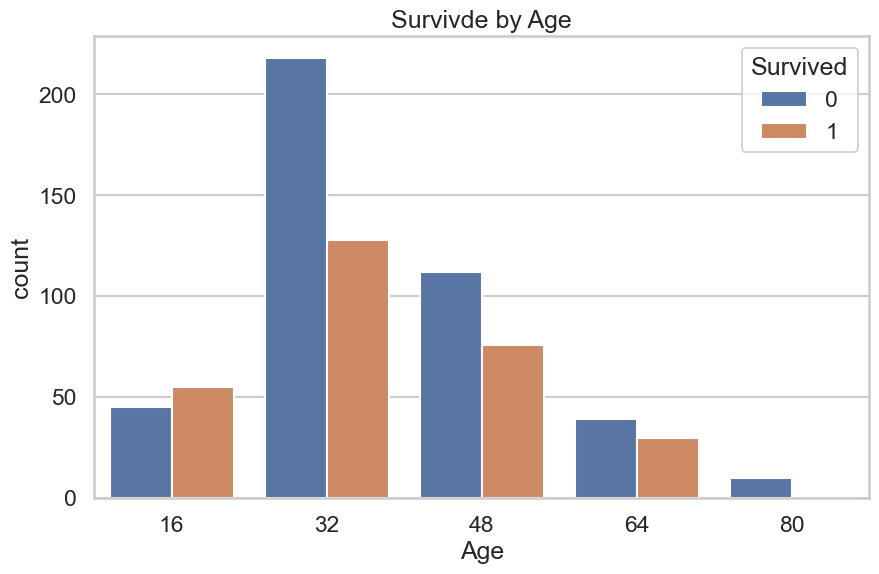

In [79]:
bins = np.linspace(0, 80, 6)

titanic_data['Age_temp'] = pd.cut(titanic_data['Age'], bins, labels=[0, 1, 2, 3, 4])

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_temp', hue='Survived', data=titanic_data)
plt.title('Survivde by Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived', loc='upper right')
plt.xticks(ticks=np.arange(5), labels=['16', '32', '48', '64', '80'])
plt.show()


Ваші висновки:
Якщо порівнювати співвідношення виживших з віком, то у процентному відноску кількість виживших підлітків до 16 років перевищує, виграє у інших вікових категоріях.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

C:\Users\admin\AppData\Local\Temp\ipykernel_8228\2803287442.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_bin = titanic_data.groupby('Fare_temp')['Survived'].mean()


Відсоток виживших:
Fare_temp
0    0.197309
1    0.303571
2    0.454955
3    0.581081
Name: Survived, dtype: float64


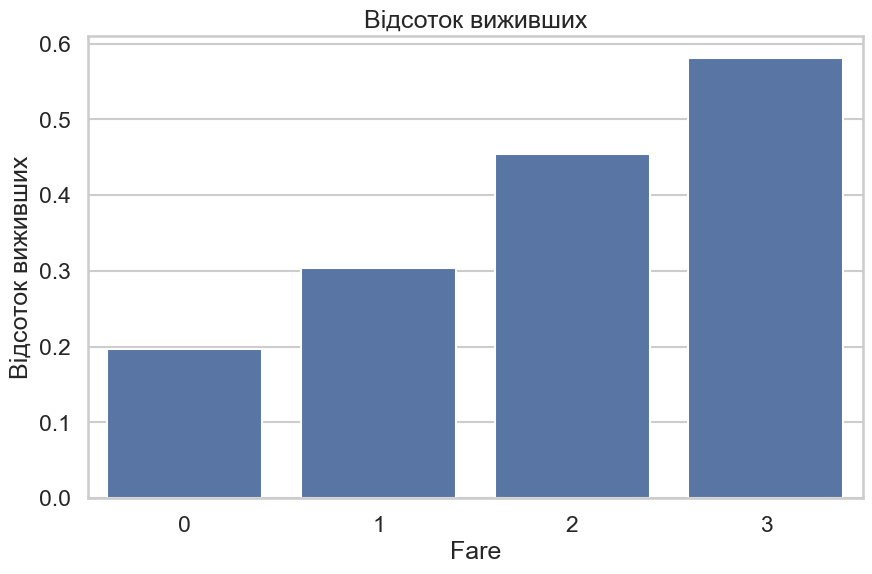

In [80]:
titanic_data['Fare_temp'] = pd.qcut(titanic_data['Fare'], q=4, labels=[0, 1, 2, 3])
survival_by_fare_bin = titanic_data.groupby('Fare_temp')['Survived'].mean()

print("Відсоток виживших:")
print(survival_by_fare_bin)

plt.figure(figsize=(10, 6))
sns.barplot(x='Fare_temp', y='Survived', data=titanic_data, errorbar=None)
plt.title('Відсоток виживших')
plt.xlabel('Fare')
plt.ylabel('Відсоток виживших')
plt.show()

Ваші висновки:

Гіпотеза є правдивою на основі аналізу даних. З результатів видно, що виживаність збільшується разом із зростанням ціни квитка. Пасажири з більш високими категоріями квитка мали вищий відсоток виживших.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [81]:
titanic_data['Family_size'] = titanic_data['Parch'] + titanic_data['SibSp']
titanic_data['Alone'] = (titanic_data['Family_size'] == 0).astype(int)
survival_by_alone = titanic_data.groupby('Alone')['Survived'].mean()

print("\nВідсоток виживших за наявністю сім'ї:")
print(survival_by_alone)

survival_by_family_size = titanic_data.groupby('Family_size')['Survived'].mean()
print("\nВідсоток за кількістю членів сім'ї:")
print(survival_by_family_size)


Відсоток виживших за наявністю сім'ї:
Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

Відсоток за кількістю членів сім'ї:
Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


Ваші висновки:
Виживання пасажирів дійсно судячі за результатами залежить від кількості членів їх сім'ї, підтверджується аналізом. Пасажири з більшою кількістю членів сім'ї мали вищий відсоток виживання.Також можна припустити, що наявність сім'ї вплинула на виживання пасажирів, оскільки середній відсоток виживших для самотніх пасажирів нижчий порівняно з пасажирами з сім'єю.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [82]:
titanic_data_droped = titanic_data.dropna(axis=1, thresh=len(titanic_data) * 0.7)
titanic_data_droped = titanic_data_droped.drop(columns=['PassengerId', 'Name', 'Ticket'])

Ваші висновки:

Ми видалили атрибути які містять більше ніж 70% пропущених значень, а також атрибути які відіграють найменьшу роль у аналізі.('PassengerId', 'Name', 'Ticket')

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [83]:
titanic_data_droped = pd.get_dummies(titanic_data_droped, columns=['Sex'], drop_first=True)
titanic_data_droped = pd.get_dummies(titanic_data_droped, columns=['Embarked'], drop_first=True)
titanic_data_droped.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_temp,Fare_temp,Family_size,Alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1,0,True,False,True
1,1,1,38.0,1,0,71.2833,2,3,1,0,False,False,False
2,1,3,26.0,0,0,7.9250,1,1,0,1,False,False,True
3,1,1,35.0,1,0,53.1000,2,3,1,0,False,False,True
4,0,3,35.0,0,0,8.0500,2,1,0,1,True,False,True


Ваші висновки:

Ми перетворили наші стовбці, змінні до числовго типу по правилу One-Hot Encoding. Також хочу зазначити, що я не знайшов у файлі titan.csv стовпець "Title", щоб виконати це завдання :(

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



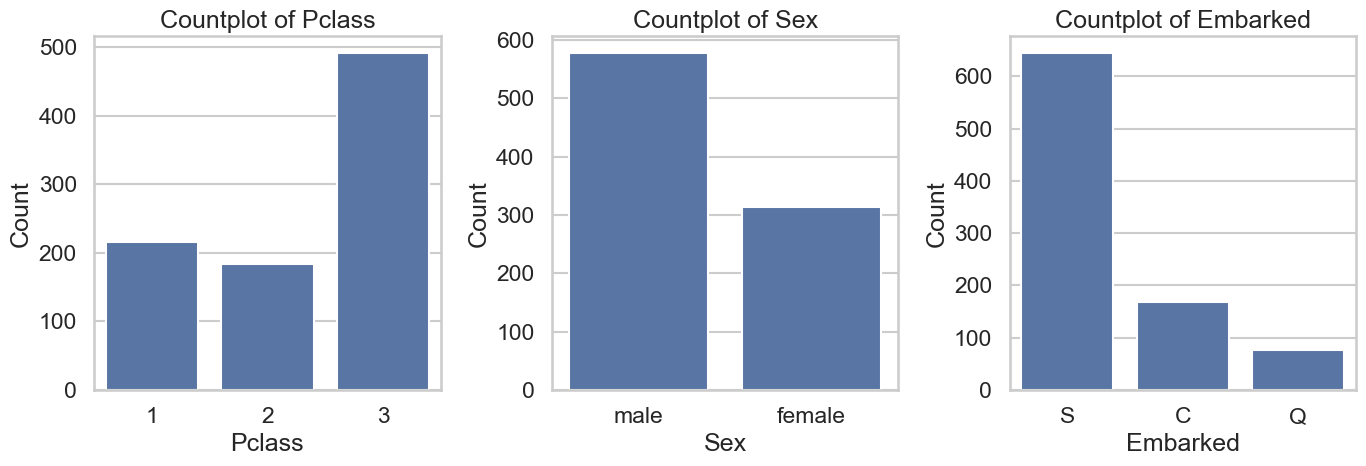

In [84]:
plt.figure(figsize=(14, 5))
for i, var in enumerate(['Pclass', 'Sex', 'Embarked'], 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=var, data=titanic_data)
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Ваші висновки:

Із цього можна по перше зазначити, що більшість пасажирів подорожували третьому класі, в той час як кількість пасажирів першого і другого класів значно менша. Кількість чоловіків у наборі даних більше, ніж кількість жінок, а також більшість пасажирів посадилися у порту Southampton, S

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

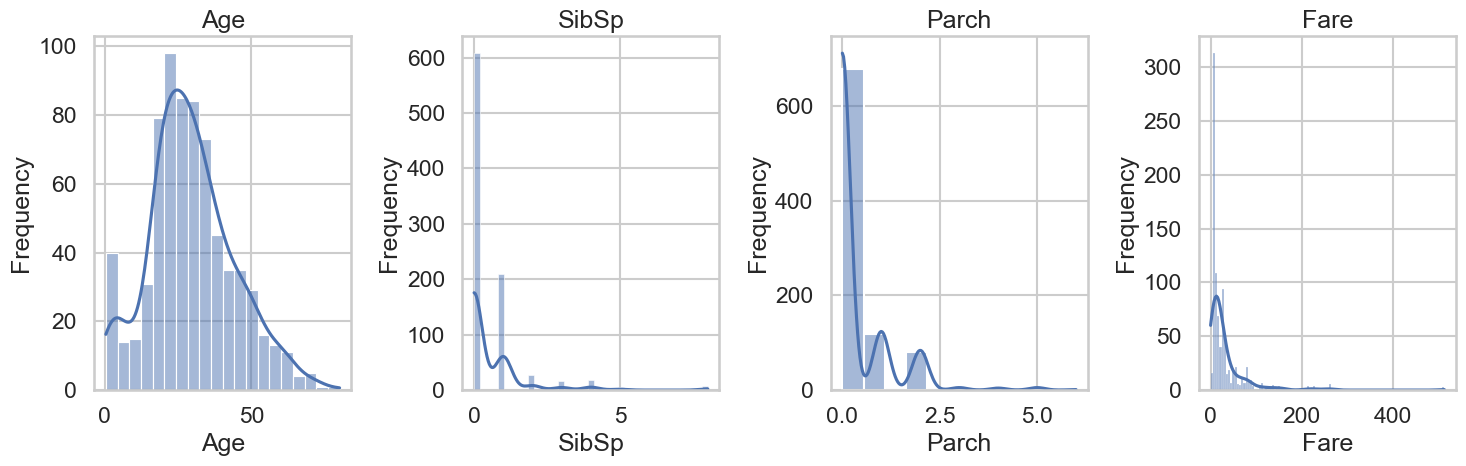

In [85]:
plt.figure(figsize=(15, 5))
for i, var in enumerate(['Age', 'SibSp', 'Parch', 'Fare'], 1):
    plt.subplot(1, 4, i)
    sns.histplot(titanic_data_droped[var], kde=True)
    plt.title(var)
    plt.xlabel(var)

plt.tight_layout()
plt.show()

Ваші висновки:

Графік 1 Age: Велика частина пасажирів була віком від 20 до 40 років, виглядає як нормальне співвідношення.<br>
Графік 2 SibSp: Більшість було без братів, сестер.<br>
Графік 3 Parch: Аналогічно до першого графіку, більшість була на борту без сімей.<br>
Графік 4 Fare: Більша частина квитків дешева.<br>

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

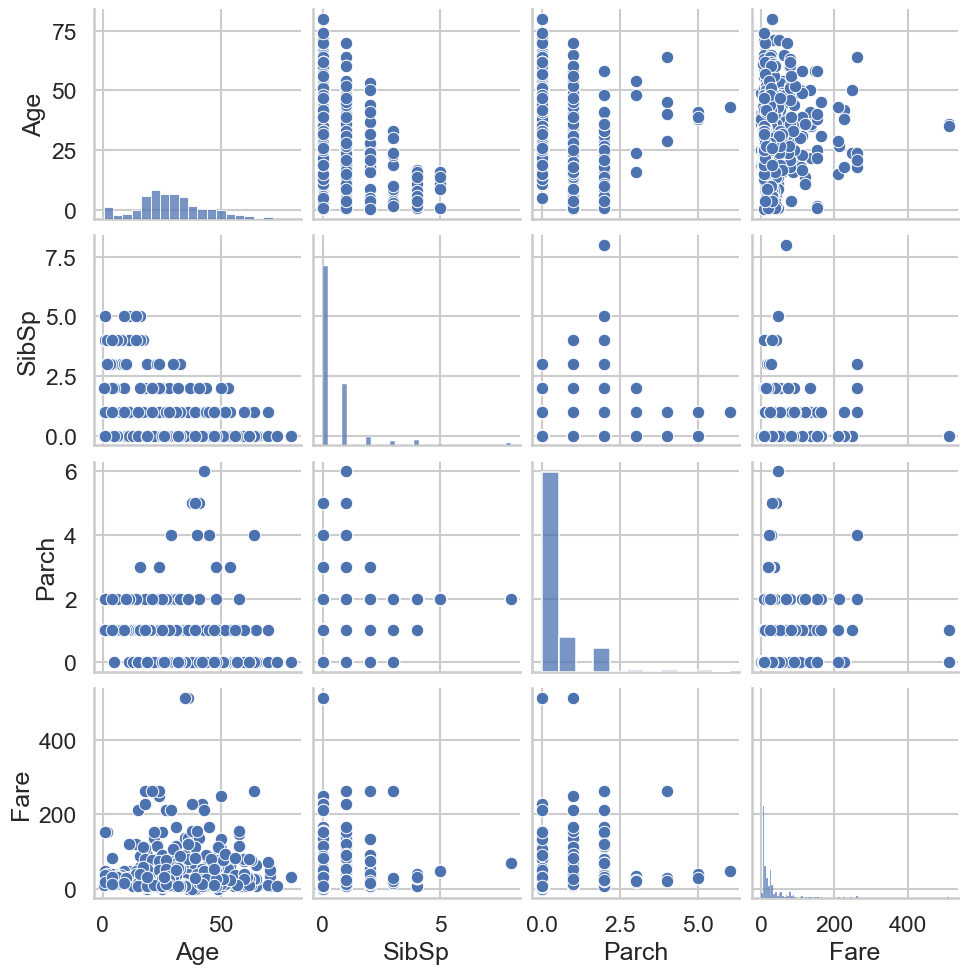

In [86]:
sns.pairplot(titanic_data[['Age', 'SibSp', 'Parch', 'Fare']])
plt.show()

Ваші висновки:

Age vs Fare:
1) Немає чіткого лінійного зв'язку між віком пасажирів та вартістю їхніх квитків.
2) Більшість пасажирів молодшого віку купували квитки з меншою вартістю.

SibSp vs Parch: Більшість пасажирів не мали багато родичів на борту.

Age vs SibSp vs Parch: Вік пасажира не впливає на його сімейний статус на борту.

Fare vs SibSp vs Parch: Вартість квитка не обов'язково визначає кількість членів сім'ї на борту.

Це були головні помічені кореляції на графіках, я яких можна було зробити висновок.






Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.